In [1]:
from source import data_import
import pandas as pd


In [2]:
p_df = data_import.import_patients(patient_ids=[1, 2, 3, 4], seizure_flag=True)
p_df.head()

chb01_03.edf was import but not resampled 256Hz.
chb01_03.edf seizure and buffer was labeled
chb01_04.edf was import but not resampled 256Hz.
chb01_04.edf seizure and buffer was labeled
chb01_15.edf was import but not resampled 256Hz.
chb01_15.edf seizure and buffer was labeled
chb01_16.edf was import but not resampled 256Hz.
chb01_16.edf seizure and buffer was labeled
chb01_18.edf was import but not resampled 256Hz.
chb01_18.edf seizure and buffer was labeled
chb01_21.edf was import but not resampled 256Hz.
chb01_21.edf seizure and buffer was labeled
chb01_26.edf was import but not resampled 256Hz.
chb01_26.edf seizure and buffer was labeled
patient chb01 sessions concatenated.
chb02_16+.edf was import but not resampled 256Hz.
chb02_16+.edf seizure and buffer was labeled
chb02_16.edf was import but not resampled 256Hz.
chb02_16.edf seizure and buffer was labeled
chb02_19.edf was import but not resampled 256Hz.
chb02_19.edf seizure and buffer was labeled
patient chb02 sessions concaten

channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,is_seizure,before_seizure,ECG
0 days 00:00:00,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,-45.128205,...,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.65812,-59.97558,False,False,NaN
0 days 00:00:00.003906250,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False,NaN
0 days 00:00:00.007812500,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False,NaN
0 days 00:00:00.011718750,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,...,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.19536,0.19536,False,False,NaN
0 days 00:00:00.015625,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,-0.195360,0.195360,0.19536,0.19536,False,False,NaN


In [3]:
data_import.save_pyarrow(p_df, file_name="preprocess_test")

/home/weasel/reps/ai-seizure-detectives/source/../data/preprocess_test.arrow was successfully written.


In [9]:
p_df = data_import.load_pyarrow(file_name="preprocess_test")

/home/weasel/reps/ai-seizure-detectives/source/../data/preprocess_test.arrow was loaded.


In [10]:
from source.filter_eeg_channels import filter_eeg_channels

channels = [
    'FP1-F3',
    'FP1-F7',
    'T8-P8-0',
    'T8-P8-1',
    'CZ-PZ',
    'FP2-F8',
    'P8-O2',
    'P7-O1',
    'T7-P7',
    'FT9-FT10']

exclude_ranges=[[58, 62], [118, 122]]
fit_df = filter_eeg_channels(p_df, channels, fs=256, exclude_ranges=exclude_ranges, Q=30)
fit_df.head()

channel,FP1-F3,FP1-F7,T8-P8-0,T8-P8-1,CZ-PZ,FP2-F8,P8-O2,P7-O1,T7-P7,FT9-FT10,before_seizure,is_seizure
0 days 00:00:00,-0.398710,-12.094205,-40.801330,-40.801330,58.078766,69.242647,122.669795,5.714844,-2.525164,-6.246458,False,False
0 days 00:00:00.003906250,-0.002848,-3.984894,-13.759008,-13.759008,19.907382,23.708426,41.899137,2.078676,-0.726857,-1.993871,False,False
0 days 00:00:00.007812500,0.147268,-0.758705,-2.982458,-2.982458,4.677136,5.541929,9.680581,0.620845,-0.017454,-0.305718,False,False
0 days 00:00:00.011718750,0.009338,-4.978767,-18.140539,-18.140539,26.544704,32.357222,56.623853,2.755701,-0.945918,-2.883424,False,False
0 days 00:00:00.015625,0.440694,6.179067,19.951526,19.951526,-27.708167,-32.562009,-57.208789,-2.511603,1.467580,3.174129,False,False


In [11]:
### go through non-seizure data (before_seizure)
# extract seizure-starts
    # for each seizure start
        # get previous 20 seconds
        # check if is_seizure in it AND if all are before_seizure
            # yes: drop and continue to next seizure start
        # take 20 seconds:
            # mean of amplitude over time per channel
            # mean of power spectrum for frequency ranges per channel

### go through seizure data (is_seizure)
# take seizre-starts
    # for each seizure start
        # get next 20 seconds
        # check if all are is_seizure
            # no: drop and continue
        # take 20 seconds:
            # mean of amplitude over time per channel
            # mean of power spectrum for frequency ranges per channel

# out put: data resampled to 20sec with features

In [12]:
fit_df.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 24484608 entries, 0 days 00:00:00 to 1 days 02:34:02.996093750
Freq: 3906250N
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FP1-F3          float64
 1   FP1-F7          float64
 2   T8-P8-0         float64
 3   T8-P8-1         float64
 4   CZ-PZ           float64
 5   FP2-F8          float64
 6   P8-O2           float64
 7   P7-O1           float64
 8   T7-P7           float64
 9   FT9-FT10        float64
 10  before_seizure  bool   
 11  is_seizure      bool   
dtypes: bool(2), float64(10)
memory usage: 2.1 GB


In [13]:
fit_df['seizure_start'] = fit_df['is_seizure'] & ~fit_df['is_seizure'].shift(fill_value=False)
fit_df.loc[fit_df['seizure_start'] == True, 'seizure_start']

0 days 00:49:55    True
0 days 01:24:26    True
0 days 02:28:51    True
0 days 03:16:54    True
0 days 04:28:39    True
0 days 05:05:26    True
0 days 06:31:01    True
0 days 07:28:16    True
0 days 07:40:54    True
0 days 08:50:52    True
0 days 09:00:45    True
0 days 10:06:54    True
0 days 11:01:55    True
0 days 12:30:45    True
0 days 13:27:45    True
0 days 14:37:55    True
0 days 15:23:28    True
0 days 18:04:47    True
0 days 20:21:05    True
0 days 23:01:38    True
0 days 23:36:41    True
Name: seizure_start, dtype: bool

In [14]:
fit_df['seizure_id'] = fit_df['seizure_start'].cumsum()
fit_df['seizure_id'].tail()

1 days 02:34:02.980468750    21
1 days 02:34:02.984375       21
1 days 02:34:02.988281250    21
1 days 02:34:02.992187500    21
1 days 02:34:02.996093750    21
Freq: 3906250N, Name: seizure_id, dtype: int64

In [15]:
fit_df.index

TimedeltaIndex([          '0 days 00:00:00', '0 days 00:00:00.003906250',
                '0 days 00:00:00.007812500', '0 days 00:00:00.011718750',
                   '0 days 00:00:00.015625', '0 days 00:00:00.019531250',
                '0 days 00:00:00.023437500', '0 days 00:00:00.027343750',
                   '0 days 00:00:00.031250', '0 days 00:00:00.035156250',
                ...
                '1 days 02:34:02.960937500', '1 days 02:34:02.964843750',
                   '1 days 02:34:02.968750', '1 days 02:34:02.972656250',
                '1 days 02:34:02.976562500', '1 days 02:34:02.980468750',
                   '1 days 02:34:02.984375', '1 days 02:34:02.988281250',
                '1 days 02:34:02.992187500', '1 days 02:34:02.996093750'],
               dtype='timedelta64[ns]', length=24484608, freq='3906250N')

In [16]:
# extract seizure-stab4seizure_intervals
    # for each seizure start

fit_df['segment_id'] = 0

b4_seizure = []
# for time, seizure in (s_df[s_df == True]).items():
for time, seizure in fit_df.loc[fit_df['seizure_start'] == True, 'seizure_start'].items():
    intervals = []
    segment_id = 15
    while True:
        # get previous 20 seconds
        int_end = time - fit_df.index.freq
        int_start = time - (pd.Timedelta(seconds=20))
        
        if int_start < pd.Timedelta('0S'):
            raise('this should probably not happen.')
        b4s_int = fit_df.loc[int_start:int_end, :].copy()
        b4s_int['segment_id'] = segment_id
    
        # check if is_seizure in it AND if all are before_seizure
        # s_int.loc['10S', 'is_seizure'] = True  # check
        if any(b4s_int['is_seizure']) or not all(b4s_int['before_seizure']):
            print(f"either previous seizure found or start of before seizure interval reached. seizure number: {b4s_int['seizure_id'].values[0]}")
            break # get out of while loop
            
        intervals.insert(0, b4s_int)
        time = int_start
        segment_id -= 1
    
    b4_seizure.extend(intervals)

b4seizure_df = pd.concat(b4_seizure)

# b4seizure_df.info()


either previous seizure found or start of before seizure interval reached. seizure number: 0
either previous seizure found or start of before seizure interval reached. seizure number: 1
either previous seizure found or start of before seizure interval reached. seizure number: 2
either previous seizure found or start of before seizure interval reached. seizure number: 3
either previous seizure found or start of before seizure interval reached. seizure number: 4
either previous seizure found or start of before seizure interval reached. seizure number: 5
either previous seizure found or start of before seizure interval reached. seizure number: 6
either previous seizure found or start of before seizure interval reached. seizure number: 7
either previous seizure found or start of before seizure interval reached. seizure number: 8
either previous seizure found or start of before seizure interval reached. seizure number: 9
either previous seizure found or start of before seizure interval reac

In [17]:
b4seizure_df.shape

(1566720, 15)

In [18]:
fitted_b4_seizure = b4seizure_df.groupby(['seizure_id', 'segment_id']).agg(['mean', 'std'])
fitted_b4_seizure.tail(50)

channel                  FP1-F3                FP1-F7                T8-P8-0  \
                           mean        std       mean         std       mean   
seizure_id segment_id                                                          
17         11         -0.982950  41.638153  -2.273771   67.837222   0.881963   
           12         -0.794068  49.738809  -0.235212   57.345990   0.240274   
           13          0.838241  63.030707   1.750617   70.729857   0.068439   
           14          0.301607  58.942759   0.122402   63.771920   0.408788   
           15          0.151785  58.943492  -0.186190   67.733226   0.137003   
18         1           1.761081  29.130886   2.155980   33.778645   0.308972   
           2          -3.698657  37.365314  -4.854401   48.082350  -0.320499   
           3           0.674882  48.548017  -0.019694   56.169184   0.073477   
           4           0.861462  37.616940   1.541252   40.087014  -0.259812   
           5           1.132161  40.432500   1.831053   47.424726   0.545480   
           6           0.072621  24.107674   0.006411   26.200276   0.229482   
           7           1.507680  39.810213   0.988413   38.386663   0.142025   
           8           0.180310  51.119087  -0.099706   55.557243   0.137608   
           9          -0.699949  28.902796  -0.363526   34.743625   0.279762   
           10         -0.995045  66.911566 -12.480826  101.590189   0.114024   
           11          0.361840  24.410354  16.346993   88.489926   0.205306   
           12          0.190601  13.101576  -2.840188   16.101492   0.078883   
           13          1.120944  18.317903   0.465522   24.940316   0.252406   
           14          0.227670  12.745550   0.277378   19.888581  -0.175901   
           15         -0.875030  27.663946  -0.467760   30.389070   0.433539   
19         1          -0.141293  12.869608  -0.408701   13.489861   0.029260   
           2           0.870634  29.598234   1.296235   33.899542   0.167690   
           3          -0.838309  43.624050  -1.143485   55.232758   0.086822   
           4           1.312141  42.045772   1.534421   45.810796 -11.809561   
           5          -0.444128  13.770041  -0.282393   13.813657  12.178336   
           6           0.000337  39.935099   0.087646   53.143995   7.820100   
           7           0.942911  18.637604   0.650414   22.694671  -6.438671   
           8           0.153631  14.826050   0.572674   13.083054   1.029945   
           9           0.242466   9.761590  -0.251279   10.517792  -0.144712   
           10         -0.348350  14.824848  -0.326129   13.454698   0.117389   
           11          0.798584  20.706607   1.392469   27.100241   0.166168   
           12          0.030479  17.996352  -0.475881   17.502501   0.015726   
           13          0.326815   8.722372   0.508881    8.257413   0.061634   
           14          0.672536  15.431787   0.376009   14.856020   0.335126   
           15         -0.143689  15.104068  -0.255872   14.649895   0.015035   
20         1           0.328646  17.193321   0.848671   17.753465  -0.058434   
           2          -0.829358  28.163527  -0.453669   39.866503  -5.734230   
           3           1.188340  13.583622   0.213675   15.446651   5.835486   
           4           0.372988  15.686550   0.847444   16.327438   0.490524   
           5           0.131114  13.352624  -0.139502   15.644204  -0.131813   
           6          -0.492523  24.294719  -0.546768   36.779411  -1.626018   
           7           0.665701  47.955465   1.222063   55.940371   1.160407   
           8           0.189945  34.299010   0.264196   44.395265   0.818313   
           9           0.342305  45.759987   0.332998   53.991489  -0.431720   
           10          1.380589  37.840714   1.019801   46.105948   0.742175   
           11         -0.416975  61.710199  -0.533450   72.159628  -0.762340   
           12         -1.523093  22.189991  -2.326928   30.325954   1.719392   


<Axes: xlabel='seizure_id,segment_id'>

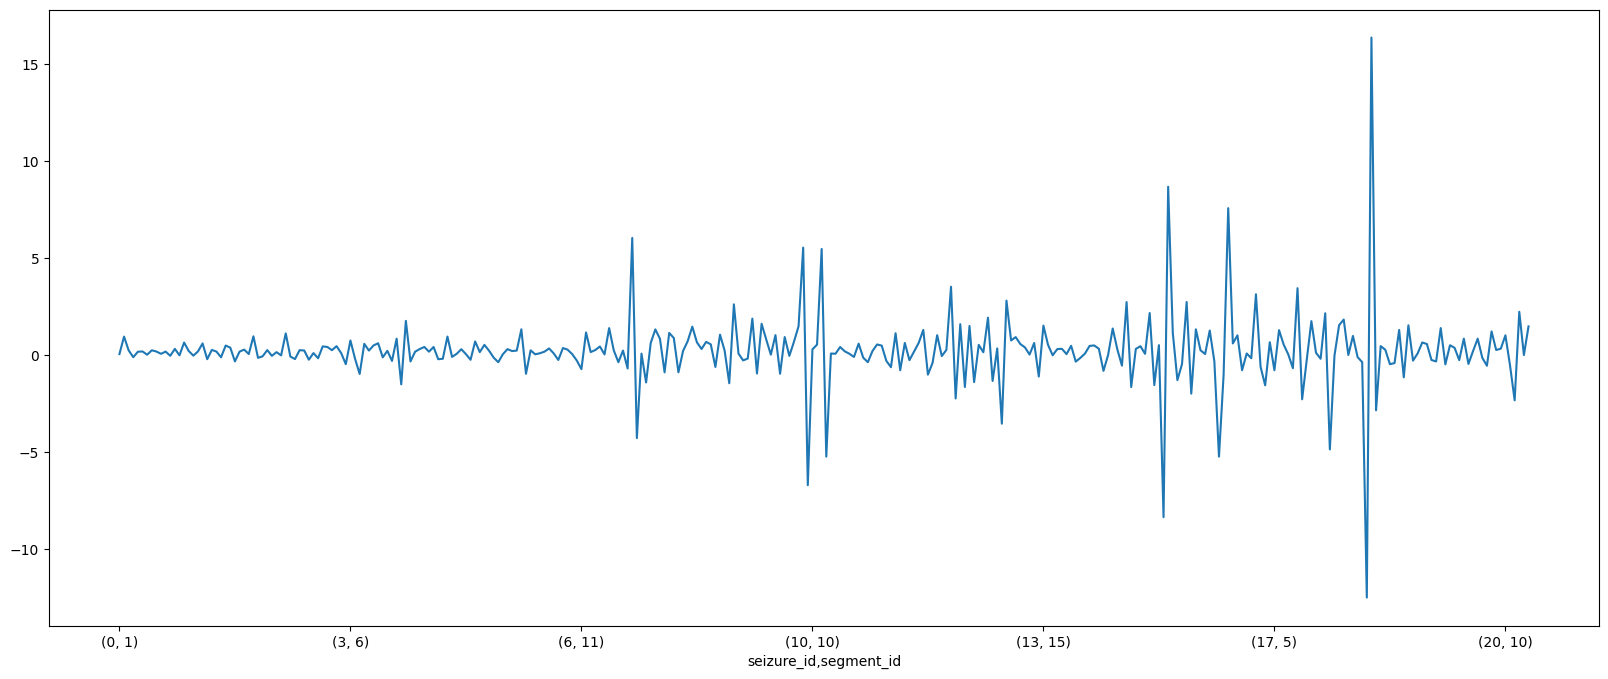

In [19]:
fitted_b4_seizure['FP1-F7', 'mean'].plot(figsize=[20,8])

<Axes: >

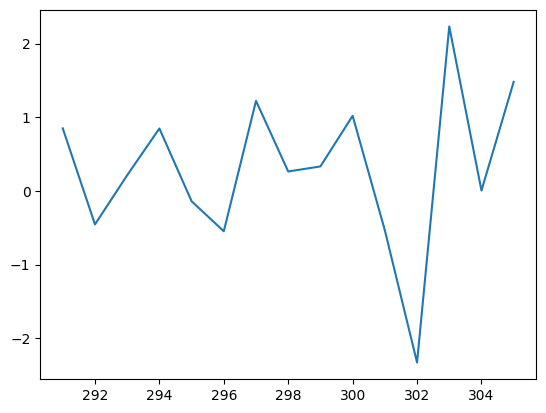

In [20]:
f = fitted_b4_seizure.reset_index()
f.loc[f['seizure_id'] == f['seizure_id'].max(), 'FP1-F7']['mean'].plot() #.iloc[-1, :] #['FP1-F7', 'mean'].plot(figsize=[20,8])


### Seizures

In [21]:
fit_df['segment_id'] = 0

post_seizure = []
# for time, seizure in (s_df[s_df == True]).items():
for time, seizure in fit_df.loc[fit_df['seizure_start'] == True, 'seizure_start'].items():
    intervals = []
    segment_id = 1
    while True:
        # get previous 20 seconds
        int_start = time  
        int_end = int_start + (pd.Timedelta(seconds=20))
        if int_start > fit_df.index[-1]:
            print('reached end of data.')
            break
        
        post_int = fit_df.loc[int_start: int_end, :].copy()
        post_int['segment_id'] = segment_id
    
        # check if is_seizure in it AND if all are before_seizure
        # s_int.loc['10S', 'is_seizure'] = True  # check
        if not all(post_int['is_seizure']):
            print(f"seizure end reached. seizure number: {post_int['seizure_id']}, number of segments completed: {segment_id-1}")
            break # get out of while loop

        intervals.append(post_int)
        time =  int_end + fit_df.index.freq
        segment_id += 1
    post_seizure.extend(intervals)

post_seizure_df = pd.concat(post_seizure)

seizure end reached. seizure number: 0 days 00:50:35.007812500    1
0 days 00:50:35.011718750    1
0 days 00:50:35.015625       1
0 days 00:50:35.019531250    1
0 days 00:50:35.023437500    1
                            ..
0 days 00:50:54.992187500    1
0 days 00:50:54.996093750    1
0 days 00:50:55              1
0 days 00:50:55.003906250    1
0 days 00:50:55.007812500    1
Freq: 3906250N, Name: seizure_id, Length: 5121, dtype: int64, number of segments completed: 2
seizure end reached. seizure number: 0 days 01:24:46.003906250    2
0 days 01:24:46.007812500    2
0 days 01:24:46.011718750    2
0 days 01:24:46.015625       2
0 days 01:24:46.019531250    2
                            ..
0 days 01:25:05.988281250    2
0 days 01:25:05.992187500    2
0 days 01:25:05.996093750    2
0 days 01:25:06              2
0 days 01:25:06.003906250    2
Freq: 3906250N, Name: seizure_id, Length: 5121, dtype: int64, number of segments completed: 1
seizure end reached. seizure number: 0 days 02:29:31.007

In [22]:
fitted_post_seizure = post_seizure_df.groupby(['seizure_id', 'segment_id']).agg(['mean', 'std'])
fitted_post_seizure.tail(50)

channel                  FP1-F3                FP1-F7                T8-P8-0  \
                           mean         std      mean         std       mean   
seizure_id segment_id                                                          
6          2           0.365990  110.513174 -0.009186  116.372173   0.493014   
           3          -0.053343  120.298321  0.637746  148.525043   0.067412   
           4           1.121671  175.046987  2.155938  164.663376  -0.728368   
7          1          -1.413405   92.605900 -0.489722   83.743169   1.074442   
           2           1.891172  126.792410  0.726534  142.607076  -0.655567   
           3           1.039598  121.945164  1.884157  139.577368  -0.689609   
           4          -1.230554  145.762399 -1.296024  148.869842   2.110318   
           5           0.601074  182.661809 -0.313249  160.156525  -2.232041   
8          1           1.087909   78.636932  0.457248   81.463011   1.354792   
           2           1.810726   84.373099  0.911199   66.370650  -1.189257   
           3          -0.351801  152.004788 -0.254674  100.396703   0.981425   
           4          -0.454982  167.187823  1.029818   93.299522   0.051575   
9          1          -2.686387   94.624350 -1.672368   97.025894  -0.037359   
           2           2.113809   90.617935  2.841116   74.086195  -0.209629   
           3           0.269699  124.526263 -2.377253   88.445147   1.079847   
           4          -1.086621  142.914153  1.256364   94.712934   0.326146   
11         1           1.056440  129.702996  0.864097  101.290912  -0.454567   
           2          -0.223373  136.367585  0.058639  129.030433  -0.346239   
12         1          -2.784963  141.682418  1.880163  119.049446   0.227155   
           2           2.543418  138.772125 -2.091776  133.420629   0.445319   
           3           2.003997  150.122800  2.866810  143.637715   0.034017   
13         1           2.430931  146.949332  3.148418  137.179488  -1.109161   
           2           1.845004  179.263969 -1.201581  144.461094   4.003824   
           3          -1.597961  185.671499  1.059573  159.355459  -1.169774   
14         1          -0.945436  112.991389  0.216132  103.024491   0.379917   
           2           0.932846  133.510866  1.566656  123.379689  -0.290293   
15         1          -6.382913  174.127579 -0.187450  161.484900  -0.664293   
           2           5.933436  124.115619  3.041741  129.759792   1.680276   
16         1          -2.820312  132.478914  0.215455  117.536791   0.246724   
           2           4.838460  110.788283  3.982451   95.296121  -0.107849   
           3           0.028376  148.886315 -3.402099  120.902431   0.414037   
17         1          -4.894395  145.257575  0.744201  154.613357   0.926146   
           2           6.113013  135.530988  2.807708  111.950654   0.871726   
18         1           0.478859   46.545716  0.617045   31.532610   0.025988   
           2           0.436891   44.549908  0.673969   45.432320   0.139084   
19         1           1.324005   41.845606  1.482102   33.099474   0.465262   
           2           0.292944   68.630894 -0.783095   59.229455  -0.304245   
           3           0.497909   67.130564  0.323472   57.092546   0.597356   
           4          -0.152349   54.029485  0.777605   56.847317   0.420342   
           5          -0.074499   46.992681 -0.456728   46.812984  -0.005546   
20         1           0.027709   35.452065  0.168390   20.270504 -10.515939   
           2           0.327516  214.573180 -0.967379  156.120253   6.151291   
           3           0.536889  300.168520  1.460642  223.540572  -1.065128   
           4           0.014714  255.113793  1.110211  231.150934  -2.965954   
           5          -0.357305  176.410849 -1.339203  159.186575   5.741508   
21         1          -0.080866   27.627785 -0.528643   24.924720  -0.552886   
           2           3.315183   96.598681 -3.755249   84.020487   0.864320   


<Axes: xlabel='seizure_id,segment_id'>

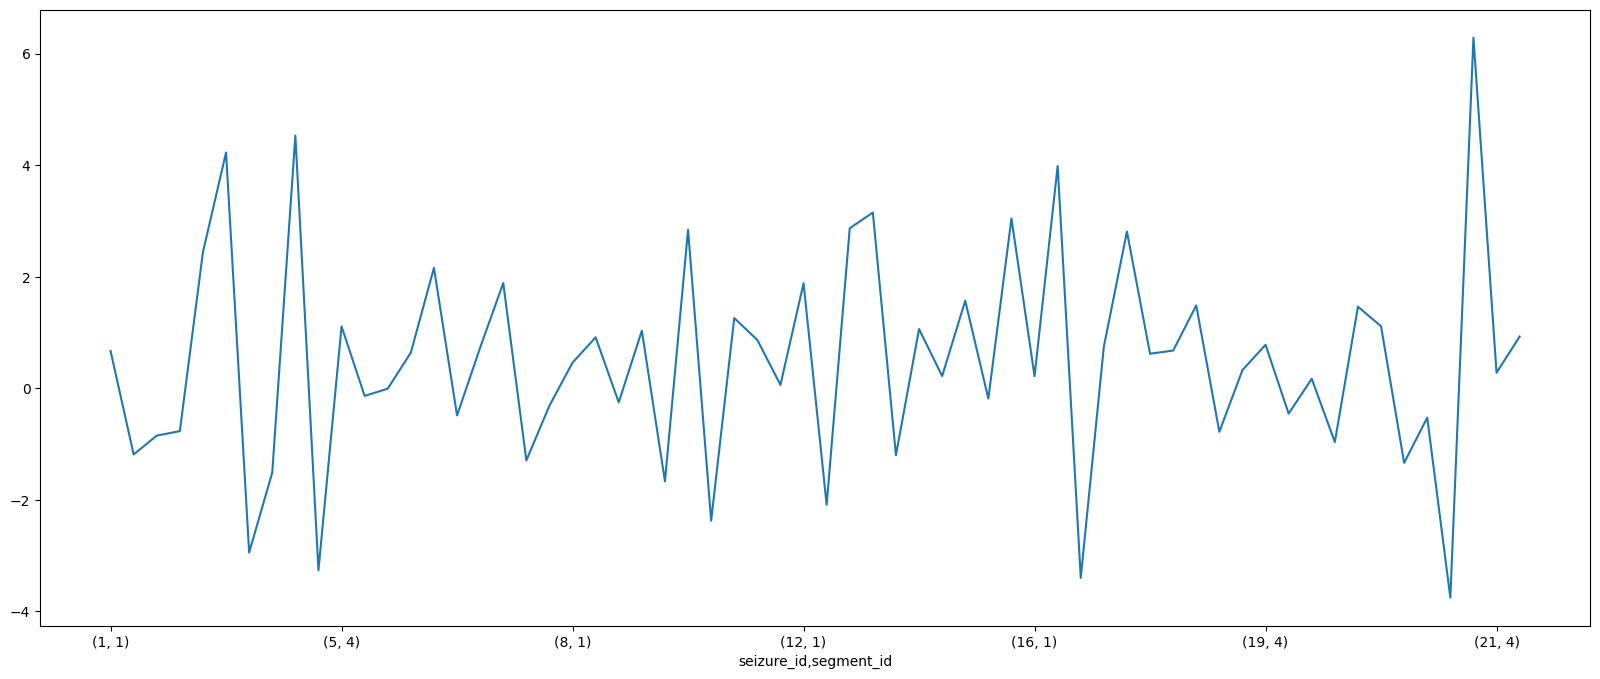

In [23]:
fitted_post_seizure['FP1-F7', 'mean'].plot(figsize=[20,8])

<Axes: >

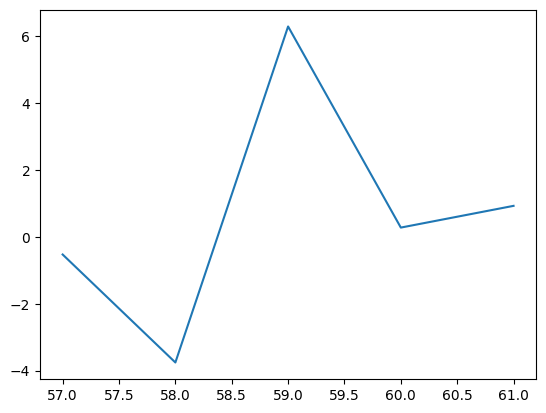

In [24]:
f = fitted_post_seizure.reset_index()
f.loc[f['seizure_id'] == f['seizure_id'].max(), 'FP1-F7']['mean'].plot() #.iloc[-1, :] #['FP1-F7', 'mean'].plot(figsize=[20,8])


In [27]:
merged_df = pd.concat(objs=[fitted_b4_seizure, fitted_post_seizure])
merged_df.shape

(368, 26)